In [1]:
import ROOT as r
import uproot
from uproot.pyroot import from_pyroot

import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

Welcome to JupyROOT 6.30/04


In [13]:
df = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/sig.root")

In [14]:
df = df.Define("ST_corr", "GLepton_pt + GHiggs_pt + GW_pt + CorrMET_pt").Define("ST_diff", "ST_corr - ST")

In [16]:
hist = df.Histo1D("ST_diff").GetValue()
h = from_pyroot(hist)

Text(0.5, 1.0, 'SIG')

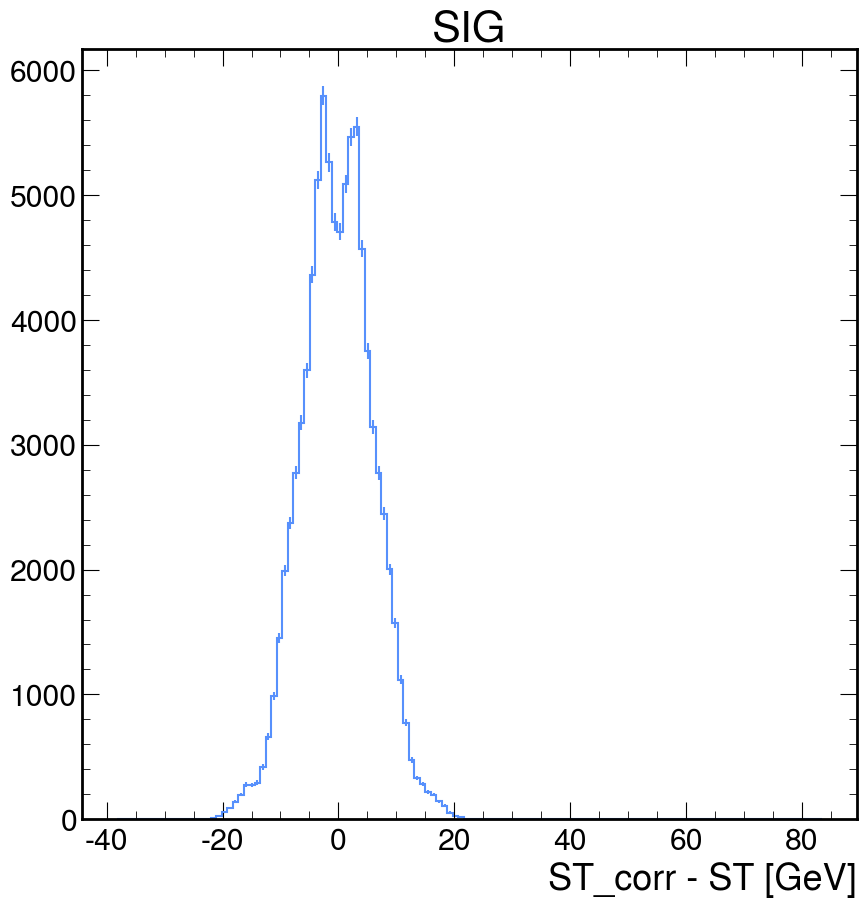

In [19]:
fig, ax = plt.subplots()
hep.histplot(h, ax=ax)
ax.set_xlabel("ST_corr - ST [GeV]")
ax.set_title("SIG")

In [10]:
df.Filter("ST_corr > 1000", "ST").Filter("Hbbscore > 0.5 && HighestWjetScore > 0.7", "HScore Cut").Sum("weight").GetValue()

6.138354278642821

In [11]:
df.Filter("ST > 1000", "ST").Filter("Hbbscore > 0.5 && HighestWjetScore > 0.7", "HScore Cut").Sum("weight").GetValue()


6.140077266414519

In [88]:
hist = df.Histo2D(("h", "2D histogram", 50, 1000, 2000, 50, 0, 600), "ST", "MET", "weight").GetValue()
h = from_pyroot(hist)

Text(0.5, 1.0, 'SIG')

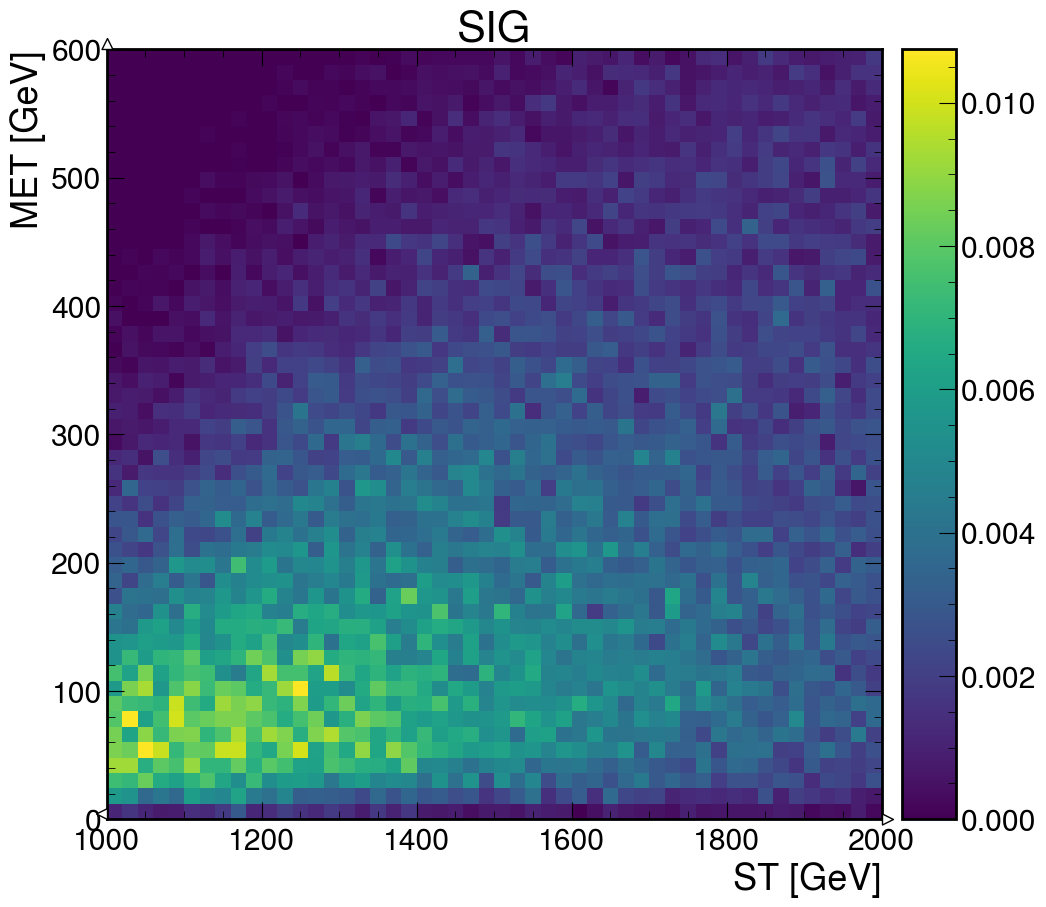

In [89]:
fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax)
ax.set_xlabel("ST [GeV]")
ax.set_ylabel("MET [GeV]")
ax.set_title("SIG")